In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split # train_test_split import

(xtr, ytr), (xte, yte) = tf.keras.datasets.mnist.load_data()

# 학습데이터 60000개, 28X28 사이즈, grey scale(1)
# 테스트 데이터 10000개, 28X28 사이즈, grey scale(1)
# 데이터 정규화(범위: 0~1)
xtr = xtr[..., None].astype("float32")/255.0   # (N,28,28,1)
xte = xte[..., None].astype("float32")/255.0

# -----------------------
# 학습 데이터를 학습 세트와 검증 세트로 분할
# -----------------------
xtr, xval, ytr, yval = train_test_split(xtr, ytr, test_size=0.2, random_state=42)


# -----------------------
# 데이터 증강 설정
# -----------------------
train_datagen = ImageDataGenerator(
    rotation_range=10,      # 최대 ±10도 회전
    width_shift_range=0.1,  # 가로 이동
    height_shift_range=0.1  # 세로 이동
)
train_datagen.fit(xtr)

# -----------------------
# 검증 데이터는 증강하지 않음
# -----------------------
val_datagen = ImageDataGenerator(
    rotation_range=10,      # 최대 ±10도 회전
    width_shift_range=0.1,  # 가로 이동
    height_shift_range=0.1  # 세로 이동
)
val_datagen.fit(xtr)

# -----------------------
# 모델 정의
# -----------------------
model = models.Sequential([
    layers.Input((28,28,1)),
    layers.Conv2D(32, 3, activation="relu"),
    layers.MaxPool2D(),
    layers.Conv2D(64, 3, activation="relu"),
    layers.MaxPool2D(),
    layers.Flatten(),
    layers.Dense(128, activation="relu"),
    layers.Dense(10, activation="softmax"),
])

model.compile(optimizer=tf.keras.optimizers.Adam(1e-3),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

model.summary()

# -----------------------
# fit에 datagen.flow 사용 (학습 세트와 검증 세트를 분리하여 전달)
# -----------------------
model.fit(train_datagen.flow(xtr, ytr, batch_size=128),
          epochs=10,
          validation_data=val_datagen.flow(xval, yval, batch_size=128)) # validation_data 사용

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)              │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


375/375 ━━━━━━━━━━━━━━━━━━━━ 19s 43ms/step - accuracy: 0.7358 - loss: 0.8334 - val_accuracy: 0.9472 - val_loss: 0.1736
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 18s 48ms/step - accuracy: 0.9518 - loss: 0.1533 - val_accuracy: 0.9642 - val_loss: 0.1140
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 18s 48ms/step - accuracy: 0.9687 - loss: 0.1047 - val_accuracy: 0.9726 - val_loss: 0.0917
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 18s 48ms/step - accuracy: 0.9739 - loss: 0.0843 - val_accuracy: 0.9810 - val_loss: 0.0670
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 15s 41ms/step - accuracy: 0.9791 - loss: 0.0665 - val_accuracy: 0.9820 - val_loss: 0.0606
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 16s 42ms/step - accuracy: 0.9813 - loss: 0.0587 - val_accuracy: 0.9836 - val_loss: 0.0522
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 16s 44ms/step - accuracy: 0.9841 - loss: 0.0522 - val_accuracy: 0.9812 - val_loss: 0.0603
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 16s 42ms/step - accuracy: 0.9840 - loss: 0.0507 - val_accurac

In [ ]:
test_loss, test_acc = model.evaluate(xte, yte)
print(f"Test accuracy: {test_acc}")

index=3
print(f"테스트 데이터를 예측하여 각 클래스별 확률 분포(softmax 결과): {model.predict(xte[:index])}")
print(f"확률 분포에서 가장 큰 값의 인덱스 (예측 클래스): {model.predict(xte[:index]).argmax(axis=1)}")
print(f"정답 라벨: {yte[:index]}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9879 - loss: 0.0314
Test accuracy: 0.9912999868392944
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 291ms/step
테스트 데이터를 예측하여 각 클래스별 확률 분포(softmax 결과): [[6.4997931e-09 1.0341502e-06 2.1906335e-05 7.1271506e-07 5.8639676e-10
  2.6458726e-09 1.5935476e-13 9.9997544e-01 4.8833488e-07 3.1567208e-07]
 [2.6941443e-08 1.0222054e-06 9.9999583e-01 2.9064462e-10 1.7177937e-10
  5.8951840e-14 3.0446984e-06 1.8328881e-09 1.5534152e-08 3.5250016e-09]
 [2.4409719e-05 9.9855143e-01 1.0837038e-05 4.0628598e-09 2.2737404e-04
  2.4928679e-06 9.8680810e-04 1.0624760e-04 8.0407510e-05 9.9491781e-06]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
확률 분포에서 가장 큰 값의 인덱스 (예측 클래스): [7 2 1]
정답 라벨: [7 2 1]


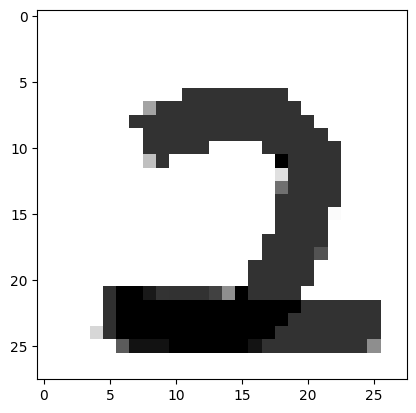

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 345ms/step
테스트 데이터를 예측하여 각 클래스별 확률 분포(softmax 결과): [[1.8349856e-04 1.7494810e-03 9.8886931e-01 9.1458904e-03 7.9670626e-09
  3.9536346e-05 1.1055171e-06 7.6481801e-06 2.2925838e-06 1.3048118e-06]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
확률 분포에서 가장 큰 값의 인덱스 (예측 클래스): [2]
정답 라벨: [2]


In [ ]:
### 손글씨 이미지
import cv2
import numpy as np # numpy as np로 수정
import matplotlib.pyplot as plt

# 1) 흑백으로 불러오기
img = cv2.imread("my_digit.png", cv2.IMREAD_GRAYSCALE)

### 정답 라벨 추가
y_custom = np.array([2])  # 정답 라벨

# 2) MNIST 형식 맞추기: 28x28
img = cv2.resize(img, (28,28))

plt.imshow(img, cmap='gray') # 이미지 표시 코드 수정 및 컬러맵 설정
plt.show() # 이미지 표시를 위해 show() 추가

# 3) 흰색 배경, 검은색 숫자로 맞추기
img = 255 - img   # 배경/글씨색 반전이 필요할 수 있음

# 4) [0,1] 정규화 + 채널 차원 추가
img = img.astype("float32") / 255.0
img = np.expand_dims(img, axis=-1)  # (28,28,1)

# 5) 배치 차원 추가
x_custom = np.expand_dims(img, axis=0)  # (1,28,28,1)

print(f"테스트 데이터를 예측하여 각 클래스별 확률 분포(softmax 결과): {model.predict(x_custom)}")
print(f"확률 분포에서 가장 큰 값의 인덱스 (예측 클래스): {model.predict(x_custom).argmax(axis=1)}")
print(f"정답 라벨: {y_custom}")